Accuracy: 0.87


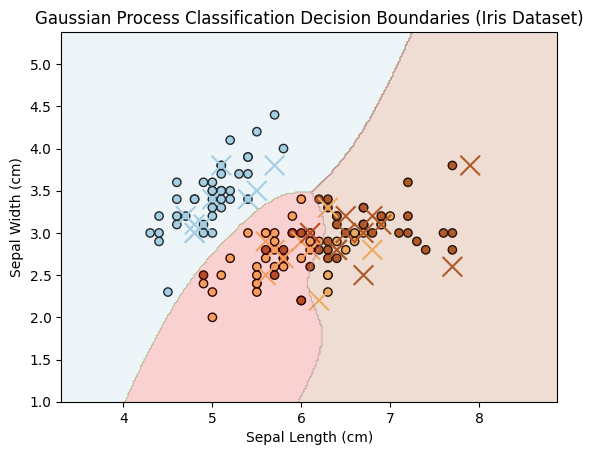

In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Using only sepal length and sepal width for visualization

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gaussian Process Classifier with an RBF kernel
kernel = 1.0 * RBF(length_scale=1.0)
classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=200)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

# Set plot labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Gaussian Process Classification Decision Boundaries (Iris Dataset)')

# Show the plot
plt.show()


# new 

G:\AMLassignment\amlass\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


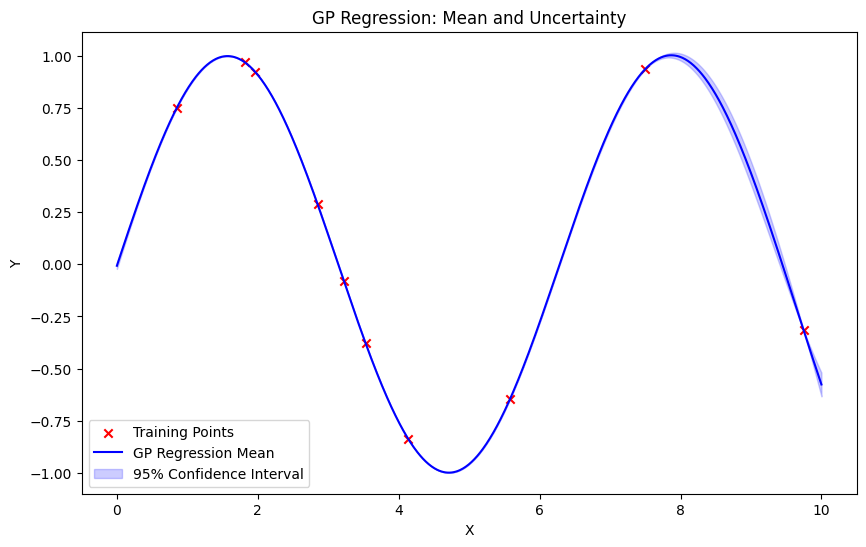

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Generate synthetic data
X = np.random.rand(10, 1) * 10
y = np.sin(X).ravel()

# Define GP kernel and fit GP regressor
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Generate test points
X_test = np.linspace(0, 10, 1000)[:, np.newaxis]

# Make predictions and get uncertainty
y_pred, sigma = gp.predict(X_test, return_std=True)

# Plot the GP regression mean and uncertainty
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='red', marker='x', label='Training Points')
plt.plot(X_test, y_pred, color='blue', label='GP Regression Mean')
plt.fill_between(X_test.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title('GP Regression: Mean and Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [32]:
X.size, X.shape

(10, (10, 1))

In [33]:
y.size, y.shape

(10, (10,))